In [307]:
# Importing all the libraries Libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew 
from sklearn.preprocessing import StandardScaler

In [308]:
# Set display option to show all rows
pd.set_option('display.max_rows', None)

# Set displaxx option to show all columns
pd.set_option('display.max_columns', None)

# Set the displax width to None (auto-detect width)
pd.set_option('display.width', None)

# If necessary, control the column width to prevent truncation
pd.set_option('display.max_colwidth', None)

In [309]:
# Reading CSV file.

p=pd.read_csv("Acoustic Features.csv")
p.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,_MFCC_Mean_7,_MFCC_Mean_8,_MFCC_Mean_9,_MFCC_Mean_10,_MFCC_Mean_11,_MFCC_Mean_12,_MFCC_Mean_13,_Roughness_Mean,_Roughness_Slope,_Zero-crossingrate_Mean,_AttackTime_Mean,_AttackTime_Slope,_Rolloff_Mean,_Eventdensity_Mean,_Pulseclarity_Mean,_Brightness_Mean,_Spectralcentroid_Mean,_Spectralspread_Mean,_Spectralskewness_Mean,_Spectralkurtosis_Mean,_Spectralflatness_Mean,_EntropyofSpectrum_Mean,_Chromagram_Mean_1,_Chromagram_Mean_2,_Chromagram_Mean_3,_Chromagram_Mean_4,_Chromagram_Mean_5,_Chromagram_Mean_6,_Chromagram_Mean_7,_Chromagram_Mean_8,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,0.118,-0.151,-0.131,0.129,0.154,0.274,0.232,0.246,51.542,0.325,403.129,0.028,-0.014,1844.664,1.336,0.082,0.173,1121.368,1970.389,3.621,18.037,0.030,0.806,0.496,0.000,0.047,0.030,0.314,0.038,0.024,0.951,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,0.799,-0.403,-0.264,-0.057,0.288,0.309,0.049,0.027,336.839,0.366,204.886,0.015,-0.079,1181.067,1.336,0.051,0.117,896.047,1959.622,4.134,21.990,0.025,0.765,0.000,0.142,0.137,0.076,0.112,0.000,0.120,0.000,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,0.140,-0.246,0.025,-0.112,-0.422,0.018,0.179,0.138,39.864,0.224,685.474,0.033,-0.278,10778.651,1.336,0.299,0.496,4181.110,4716.084,0.902,2.366,0.091,0.897,0.412,0.245,0.526,0.095,0.519,0.001,0.563,0.282,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,0.143,0.047,0.242,0.018,0.168,0.141,0.245,0.146,353.744,0.215,579.859,0.029,-0.076,6745.549,2.105,0.121,0.319,2492.422,3744.719,1.689,4.780,0.053,0.840,0.307,0.278,0.281,0.208,0.733,0.002,0.276,0.436,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,0.285,0.104,0.013,-0.235,-0.207,-0.276,-0.294,-0.190,46.884,-0.118,430.536,0.040,-0.282,3328.373,1.370,0.208,0.279,1776.484,2842.952,2.739,10.627,0.046,0.830,0.091,0.000,0.022,0.396,0.011,0.000,0.135,0.635,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [310]:
p.shape

(400, 51)

In [311]:
# checking null values.

p.isnull().sum()

Class                                             0
_RMSenergy_Mean                                   0
_Lowenergy_Mean                                   0
_Fluctuation_Mean                                 0
_Tempo_Mean                                       0
_MFCC_Mean_1                                      0
_MFCC_Mean_2                                      0
_MFCC_Mean_3                                      0
_MFCC_Mean_4                                      0
_MFCC_Mean_5                                      0
_MFCC_Mean_6                                      0
_MFCC_Mean_7                                      0
_MFCC_Mean_8                                      0
_MFCC_Mean_9                                      0
_MFCC_Mean_10                                     0
_MFCC_Mean_11                                     0
_MFCC_Mean_12                                     0
_MFCC_Mean_13                                     0
_Roughness_Mean                                   0
_Roughness_S

In [312]:
# Handling duplicates.

print("Before: Number of duplicate records: ",p.duplicated().sum())
p.drop_duplicates(inplace=True)
print("After: Number of duplicate records: ",p.duplicated().sum())


Before: Number of duplicate records:  12
After: Number of duplicate records:  0


In [313]:
p.shape

(388, 51)

In [314]:
p['Class'].value_counts()

Class
sad      98
relax    97
angry    97
happy    96
Name: count, dtype: int64

In [315]:
# Encoding classes of target feature for easy representation and model understanding.

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
p['Class'] = label_encoder.fit_transform(p['Class'].astype(str))

# Now target_encoded contains numerical values (0, 1, 2, 3) corresponding to the four classes


In [316]:
# Describes the statistics of each feature.
p.describe()


,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,_MFCC_Mean_7,_MFCC_Mean_8,_MFCC_Mean_9,_MFCC_Mean_10,_MFCC_Mean_11,_MFCC_Mean_12,_MFCC_Mean_13,_Roughness_Mean,_Roughness_Slope,_Zero-crossingrate_Mean,_AttackTime_Mean,_AttackTime_Slope,_Rolloff_Mean,_Eventdensity_Mean,_Pulseclarity_Mean,_Brightness_Mean,_Spectralcentroid_Mean,_Spectralspread_Mean,_Spectralskewness_Mean,_Spectralkurtosis_Mean,_Spectralflatness_Mean,_EntropyofSpectrum_Mean,_Chromagram_Mean_1,_Chromagram_Mean_2,_Chromagram_Mean_3,_Chromagram_Mean_4,_Chromagram_Mean_5,_Chromagram_Mean_6,_Chromagram_Mean_7,_Chromagram_Mean_8,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,1.505155,0.134113,0.554229,7.119585,123.763853,2.450974,0.075428,0.489289,0.028884,0.183059,0.039216,0.059977,0.043286,0.021036,0.026580,0.028291,0.017170,0.024835,523.977534,0.072843,998.478812,0.031379,-0.001521,5693.498023,2.770139,0.249564,0.434474,2582.675552,3082.775753,1.864307,7.314214,0.048629,0.872688,0.353892,0.251284,0.362549,0.207026,0.347742,0.265268,0.245598,0.390348,0.356446,0.589562,0.342820,0.390183,0.328276,0.192930,0.000608,1.776680,0.769451,0.966711
std,1.121771,0.064511,0.050750,2.215034,34.036019,0.796678,0.538998,0.296201,0.278776,0.195238,0.205306,0.182032,0.167222,0.160322,0.153359,0.136004,0.129279,0.133492,521.821192,0.173360,526.526771,0.016870,0.149725,2281.712385,1.314248,0.155600,0.131350,861.168286,765.377501,0.875974,8.645245,0.026625,0.037033,0.323940,0.284859,0.321651,0.252893,0.300547,0.293800,0.278520,0.328773,0.335286,0.358927,0.314823,0.350166,0.055536,0.047032,0.104372,0.932943,0.072080,0.003873
min,0.000000,0.010000,0.302000,3.580000,48.284000,0.323000,-3.484000,-0.870000,-1.636000,-0.494000,-0.916000,-0.936000,-0.744000,-0.621000,-0.544000,-0.487000,-0.418000,-0.620000,0.941000,-0.525000,149.490000,0.010000,-0.465000,887.151000,0.234000,0.011000,0.053000,606.524000,814.817000,0.390000,1.930000,0.006000,0.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112000,0.060000,-0.285000,0.187000,0.530000,0.939000
25%,0.750000,0.084750,0.525500,5.863500,101.490250,1.943250,-0.255250,0.281250,-0.121750,0.062000,-0.078250,-0.041250,-0.051250,-0.074000,-0.061500,-0.044000,-0.056000,-0.045500,166.365750,-0.027250,592.275000,0.023000,-0.093000,3938.315750,1.737000,0.127750,0.350750,1975.873500,2520.463250,1.327250,3.881500,0.029000,0.853000,0.057750,0.019000,0.079750,0.016750,0.088750,0.021500,0.025750,0.102750,0.068500,0.260500,0.062750,0.061750,0.290750,0.160000,-0.058000,0.961000,0.725000,0.965000
50%,2.000000,0.127000,0.554000,6.734000,120.132500,2.378500,0.066500,0.476000,0.041000,0.188500,0.049500,0.073000,0.039500,0.014500,0.029000,0.037000,0.022500,0.039000,365.310500,0.068500,893.491000,0.027000,0.009000,5684.092500,2.773000,0.218000,0.448000,2548.293000,3141.479000,1.685500,5.206000,0.047000,0.879000,0.269000,0.142500,0.288500,0.104000,0.271000,0.144000,0.141000,0.295500,0.249500,0.609500,0.249000,0.302500,0.333000,0.191000,-0.001000,1.682000,0.785500,0.967000
75

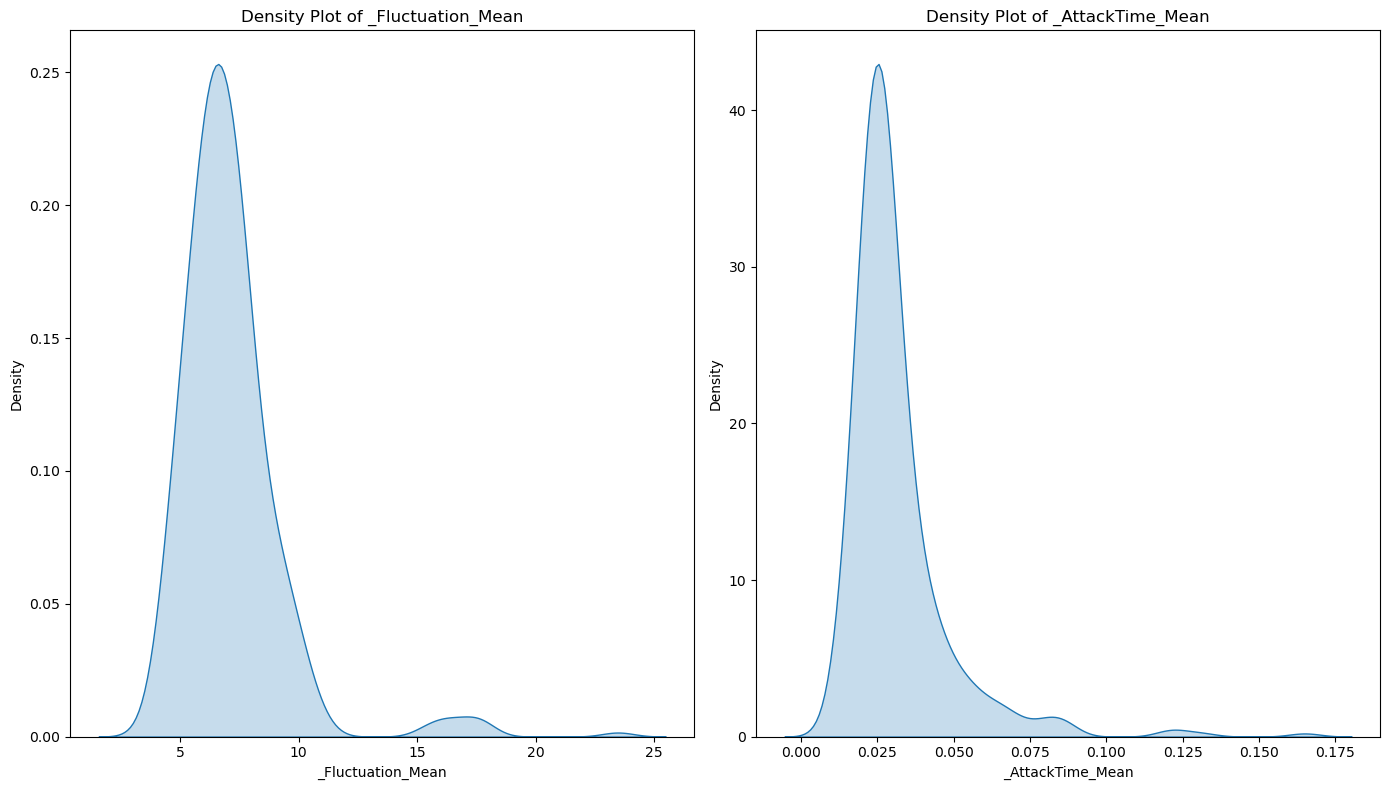

In [317]:
# Density distribution of two before outlier capping features.

def plot_density_subplots(df, feature1, feature2):
    plt.figure(figsize=(14, 8))

    # First subplot
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
    sns.kdeplot(df[feature1], fill=True)
    plt.title(f'Density Plot of {feature1}')
    plt.xlabel(feature1)
    plt.ylabel('Density')

    # Second subplot
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
    sns.kdeplot(df[feature2], fill=True)
    plt.title(f'Density Plot of {feature2}')
    plt.xlabel(feature2)
    plt.ylabel('Density')

    
    plt.tight_layout()
    plt.show()

# Example usage
plot_density_subplots(p, '_Fluctuation_Mean', '_AttackTime_Mean')



In [318]:
# Function to detect outliers using the standard deviation method

def outlier_detect_sd(merged_train, col, threshold=3):
    # Calculate the mean and standard deviation
    mean = merged_train[col].mean()
    std_dev = merged_train[col].std()

    # Define the lower and upper bounds
    lower_bound = mean - (threshold * std_dev)
    upper_bound = mean + (threshold * std_dev)

    # Detect lower and upper outliers
    lower_outliers = merged_train[merged_train[col] < lower_bound][col].tolist()
    upper_outliers = merged_train[merged_train[col] > upper_bound][col].tolist()

    # Number of outliers
    num_lower_outliers = len(lower_outliers)
    num_upper_outliers = len(upper_outliers)

    # Return all the required details
    return {
        "Column Name": col,
        "Mean": mean,
        "Standard Deviation": std_dev,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Lower Capped Value": mean - (threshold * std_dev),  # Winsorized lower bound
        "Upper Capped Value": mean + (threshold * std_dev),  # Winsorized upper bound
        "Number of Lower Outliers": num_lower_outliers,
        "Number of Upper Outliers": num_upper_outliers,
        "Lower Outliers": lower_outliers,
        "Upper Outliers": upper_outliers,
    }

# List to store outlier information for each column
outlier_summary_sd = []

# List of selected columns
sel_columns = [i for i in p.columns[1:]]  # Assuming `p` is your DataFrame

# Loop through each column and log outlier details
for col in sel_columns:
    outlier_info = outlier_detect_sd(p, col, threshold=3)  # 3 SD is the typical threshold for outliers
    outlier_summary_sd.append(outlier_info)

# Convert the summary to a DataFrame
outlier_df_sd = pd.DataFrame(outlier_summary_sd)
outlier_df_sd.head(5)


,Column Name,Mean,Standard Deviation,Lower Bound,Upper Bound,Lower Capped Value,Upper Capped Value,Number of Lower Outliers,Number of Upper Outliers,Lower Outliers,Upper Outliers
0,_RMSenergy_Mean,0.134113,0.064511,-0.059419,0.327646,-0.059419,0.327646,0,1,[],[0.431]
1,_Lowenergy_Mean,0.554229,0.050750,0.401980,0.706478,0.401980,0.706478,2,0,"[0.302, 0.321]",[]
2,_Fluctuation_Mean,7.119585,2.215034,0.474484,13.764686,0.474484,13.764686,0,10,[],"[15.541, 17.573, 17.32, 16.172, 16.531, 16.487, 17.793, 15.547, 23.475, 17.599]"
3,_Tempo_Mean,123.763853,34.036019,21.655796,225.871911,21.655796,225.871911,0,0,[],[]
4,_MFCC_Mean_1,2.450974,0.796678,0.060941,4.841007,0.060941,4.841007,0,5,[],"[4.844, 5.161, 4.958, 5.996, 5.354]"


In [319]:
# Capping the outliers to 3*SD.

def cap_outliers_by_sd(df, col):
    # Calculate the mean and standard deviation
    mean = df[col].mean()
    std_dev = df[col].std()

    # Define the lower and upper bounds
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev

    # Cap the values outside the bounds
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return lower_bound, upper_bound

# Example usage
sel_columns = [i for i in p.columns[1:]]
capped_data = p.copy()

# Loop through each selected column to apply outlier capping
for col in sel_columns:
    ll, uu = cap_outliers_by_sd(capped_data, col)
    
capped_data.head()


,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,_MFCC_Mean_7,_MFCC_Mean_8,_MFCC_Mean_9,_MFCC_Mean_10,_MFCC_Mean_11,_MFCC_Mean_12,_MFCC_Mean_13,_Roughness_Mean,_Roughness_Slope,_Zero-crossingrate_Mean,_AttackTime_Mean,_AttackTime_Slope,_Rolloff_Mean,_Eventdensity_Mean,_Pulseclarity_Mean,_Brightness_Mean,_Spectralcentroid_Mean,_Spectralspread_Mean,_Spectralskewness_Mean,_Spectralkurtosis_Mean,_Spectralflatness_Mean,_EntropyofSpectrum_Mean,_Chromagram_Mean_1,_Chromagram_Mean_2,_Chromagram_Mean_3,_Chromagram_Mean_4,_Chromagram_Mean_5,_Chromagram_Mean_6,_Chromagram_Mean_7,_Chromagram_Mean_8,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,2,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,0.118000,-0.151,-0.131,0.129,0.154,0.274,0.232,0.246,51.542,0.325,403.129,0.028,-0.014,1844.664,1.336,0.082,0.173,1121.368,1970.389,3.621,18.037,0.030,0.806,0.496,0.000,0.047,0.030,0.314,0.038,0.024,0.951,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,2,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,0.655135,-0.403,-0.264,-0.057,0.288,0.309,0.049,0.027,336.839,0.366,204.886,0.015,-0.079,1181.067,1.336,0.051,0.117,896.047,1959.622,4.134,21.990,0.025,0.765,0.000,0.142,0.137,0.076,0.112,0.000,0.120,0.000,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,2,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,0.140000,-0.246,0.025,-0.112,-0.422,0.018,0.179,0.138,39.864,0.224,685.474,0.033,-0.278,10778.651,1.336,0.299,0.496,4181.110,4716.084,0.902,2.366,0.091,0.897,0.412,0.245,0.526,0.095,0.519,0.001,0.563,0.282,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,2,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,0.143000,0.047,0.242,0.018,0.168,0.141,0.245,0.146,353.744,0.215,579.859,0.029,-0.076,6745.549,2.105,0.121,0.319,2492.422,3744.719,1.689,4.780,0.053,0.840,0.307,0.278,0.281,0.208,0.733,0.002,0.276,0.436,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,2,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,0.285000,0.104,0.013,-0.235,-0.207,-0.276,-0.294,-0.190,46.884,-0.118,430.536,0.040,-0.282,3328.373,1.370,0.208,0.279,1776.484,2842.952,2.739,10.627,0.046,0.830,0.091,0.000,0.022,0.396,0.011,0.000,0.135,0.635,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [320]:
# Checking the skewness of each feature.

capped_data.skew()

# Some features have positive skewness.

Class                                            -0.007417
_RMSenergy_Mean                                   0.578734
_Lowenergy_Mean                                   0.004404
_Fluctuation_Mean                                 1.428343
_Tempo_Mean                                       0.116278
_MFCC_Mean_1                                      0.632683
_MFCC_Mean_2                                      0.021392
_MFCC_Mean_3                                      0.192700
_MFCC_Mean_4                                     -0.248835
_MFCC_Mean_5                                     -0.052598
_MFCC_Mean_6                                     -0.079845
_MFCC_Mean_7                                     -0.265792
_MFCC_Mean_8                                      0.038063
_MFCC_Mean_9                                      0.021998
_MFCC_Mean_10                                    -0.173327
_MFCC_Mean_11                                    -0.256146
_MFCC_Mean_12                                    -0.3257

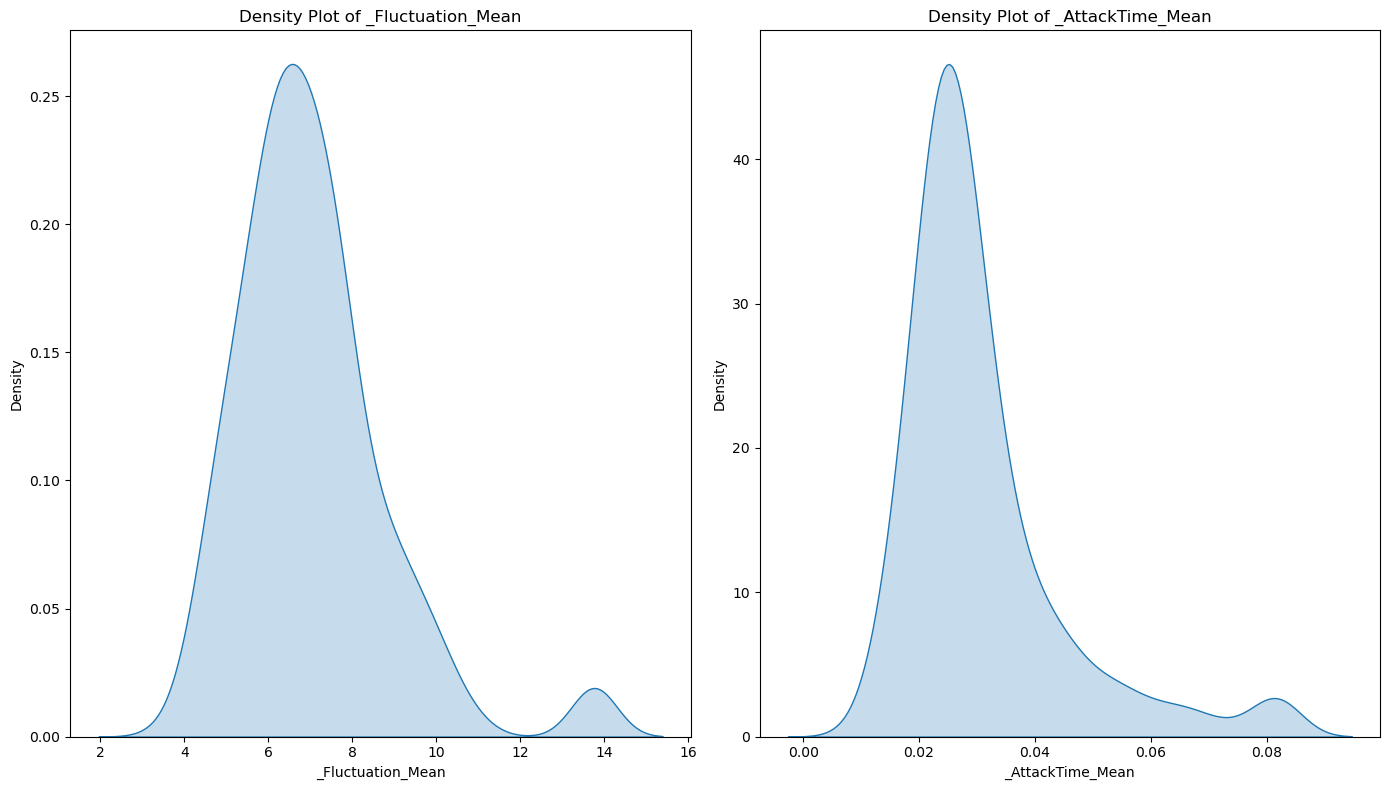

In [321]:
# Density distribution of two before outlier capping features.

def plot_density_subplots(df, feature1, feature2):
    plt.figure(figsize=(14, 8))

    # First subplot
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
    sns.kdeplot(df[feature1], fill=True)
    plt.title(f'Density Plot of {feature1}')
    plt.xlabel(feature1)
    plt.ylabel('Density')

    # Second subplot
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
    sns.kdeplot(df[feature2], fill=True)
    plt.title(f'Density Plot of {feature2}')
    plt.xlabel(feature2)
    plt.ylabel('Density')

    
    plt.tight_layout()
    plt.show()

# Example usage
plot_density_subplots( capped_data, '_Fluctuation_Mean', '_AttackTime_Mean')



In [322]:
# Scaling features so as to maintain uniform scale.

def scale_features(df):

    first_column = df.iloc[:, 0]
    features_to_scale = df.iloc[:, 1:]
    
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features_to_scale)
    scaled_features_df = pd.DataFrame(scaled_features, columns=features_to_scale.columns, index=df.index)
    scaled_df = pd.concat([first_column, scaled_features_df], axis=1)
    
    return scaled_df


scaled_data = scale_features(capped_data)



In [323]:
# Necessary Libraries for training and evaluation.

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from lightgbm import LGBMClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [324]:
# Separating the input features and target.

X=scaled_data.drop('Class',axis=1)
y=scaled_data['Class']

In [325]:
# Definition of MISFS implementation.

def misfs_feature_selection(X, y):
    """
    MISFS: Mutual Information with Sequential Forward Selection

    Parameters:
    - X: Feature matrix (can be a DataFrame or NumPy array)
    - y: Target vector
    - k_features: Number of top features to select in the Mutual Information phase
    - classifier: Classifier to use for Sequential Forward Selection (default: KNeighborsClassifier)
    - cv_folds: Number of cross-validation folds

    Returns:
    - Selected feature indices
    - Sequential Forward Selection fitted model
    """
    
    k_features = 47
    classifier = KNeighborsClassifier(n_neighbors=5)
    cv_folds = 5

    if classifier is None:
        classifier = KNeighborsClassifier()

    # Ensure X is a NumPy array for compatibility
    if isinstance(X, pd.DataFrame):
        X_np = X.values
    else:
        X_np = X

    # Phase 1: Mutual Information (Filter Method)
    print("Phase 1: Calculating Mutual Information...")
    mi_scores = mutual_info_classif(X_np, y, random_state=42)
    mi_indices = np.argsort(mi_scores)[::-1]  # Sort features by MI score (descending)
    top_k_indices = mi_indices[:k_features]
    print(f"Top {k_features} features selected after Mutual Information: {top_k_indices}")

    # Phase 2: Sequential Forward Selection (Wrapper Method)
    print("Phase 2: Sequential Forward Selection...")
    sfs = SequentialFeatureSelector(
        classifier,
        n_features_to_select= "auto",  # Will find optimal features dynamically
        direction="forward",
        scoring="accuracy",
        cv=KFold(n_splits=cv_folds, shuffle=True, random_state=42),
        n_jobs=-1
    )
    X_reduced = X_np[:, top_k_indices]  # Reduce features to top_k from MI phase
    sfs.fit(X_reduced, y)

    # Map selected features back to original indices
    sfs_selected_indices = top_k_indices[sfs.get_support()]
    print(f"Final selected features: {sfs_selected_indices}")

    return sfs_selected_indices


In [326]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Run MISFS
selected_features = misfs_feature_selection(X_train, y_train)

# Selected features.

X_train_reduced = X_train.iloc[:, selected_features]
X_test_reduced = X_test.iloc[:, selected_features]


Phase 1: Calculating Mutual Information...
Top 47 features selected after Mutual Information: [45 19 48  2 23 44 31 25 20 24  5 10  4 22 38 43 37  6  7 13 12 34 27 26
 17  9 14 28 11 40 18 33 46 29 16 49 32  3 21 42 30 47 35 39  0 41  1]
Phase 2: Sequential Forward Selection...
Final selected features: [45 19 48 23 44 31 25 24  4 22 37  7 12 34 27 28 18 33 29 32 30 47 39]


In [327]:
print(X_train_reduced.shape)
X_train_reduced.head(2)

(271, 23)


,_HarmonicChangeDetectionFunction_Std,_Zero-crossingrate_Mean,_HarmonicChangeDetectionFunction_PeriodAmp,_Eventdensity_Mean,_HarmonicChangeDetectionFunction_Mean,_EntropyofSpectrum_Mean,_Brightness_Mean,_Pulseclarity_Mean,_MFCC_Mean_1,_Rolloff_Mean,_Chromagram_Mean_6,_MFCC_Mean_4,_MFCC_Mean_9,_Chromagram_Mean_3,_Spectralspread_Mean,_Spectralskewness_Mean,_Roughness_Slope,_Chromagram_Mean_2,_Spectralkurtosis_Mean,_Chromagram_Mean_1,_Spectralflatness_Mean,_HarmonicChangeDetectionFunction_PeriodFreq,_Chromagram_Mean_8
24,0.386129,-0.752667,0.438764,-0.354987,0.666682,0.086878,0.118354,-0.174910,-0.608708,0.780779,0.186531,1.601240,0.332700,1.984369,0.759615,-0.643615,0.451964,-0.591524,-0.558887,-0.413857,1.216704,-0.703716,1.744034
391,-0.893829,-0.165250,0.536416,-0.534948,-0.191200,0.579517,0.156469,-0.424352,-0.245447,0.517892,0.333078,0.709378,0.809513,1.894093,0.436848,-0.533771,-0.580073,0.248572,-0.532108,0.034335,0.279749,-0.302317,0.644595


               Classifier  Accuracy  F1 Macro  Precision Macro  Recall Macro
0  RandomForestClassifier  0.846154  0.847753         0.864286      0.860525 

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.96      0.96      0.96        28
           2       1.00      0.70      0.83        37
           3       0.60      0.91      0.72        23

    accuracy                           0.85       117
   macro avg       0.86      0.86      0.85       117
weighted avg       0.89      0.85      0.85       117




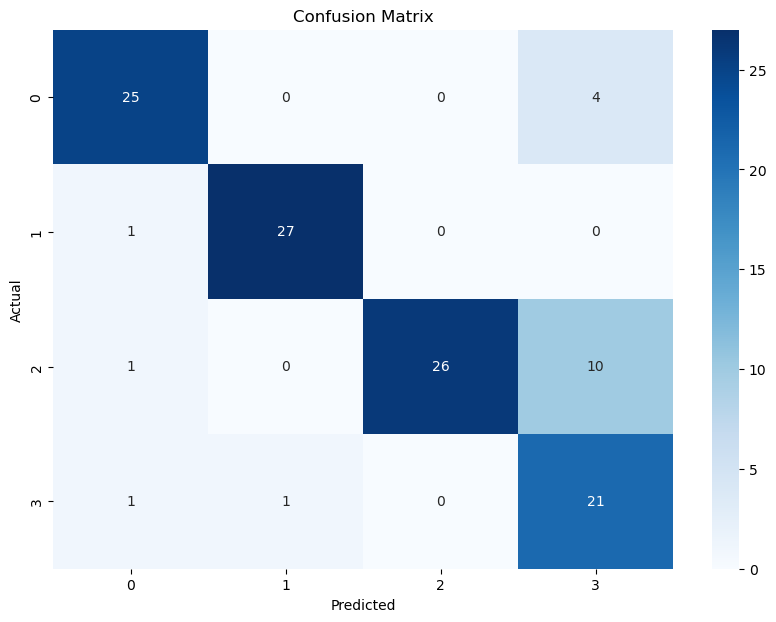

In [328]:
# Training and test Random Forest Classifier.

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train_reduced, y_train)
y_pred = clf.predict(X_test_reduced)

re= []
# Calculate metrics.
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average="macro")
precision_macro = precision_score(y_test, y_pred, average="macro")
recall_macro = recall_score(y_test, y_pred, average="macro")

# Append results to the list.
re.append({
    "Classifier": "RandomForestClassifier",
    "Accuracy": accuracy,
    "F1 Macro": f1_macro,
    "Precision Macro": precision_macro,
    "Recall Macro": recall_macro,
})

re = pd.DataFrame(re)
print(re,"\n")

print(classification_report(y_test, y_pred))
print()


cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix.png")  # Save confusion matrix as an image
plt.show()

# Results: Aman : All evaluation metrix. 

In [329]:
"""-------------------------------------------------------------------------------------------------------------------------------"""

'-------------------------------------------------------------------------------------------------------------------------------'

In [330]:
# Other Approaches.

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Accuracy: 0.8462
Precision (Macro): 0.8600
Recall (Macro): 0.8584
F1 Score (Macro): 0.8464

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        29
           1       0.90      0.93      0.91        28
           2       1.00      0.73      0.84        37
           3       0.62      0.91      0.74        23

    accuracy                           0.85       117
   macro avg       0.86      0.86      0.85       117
weighted avg       0.88      0.85      0.85       117



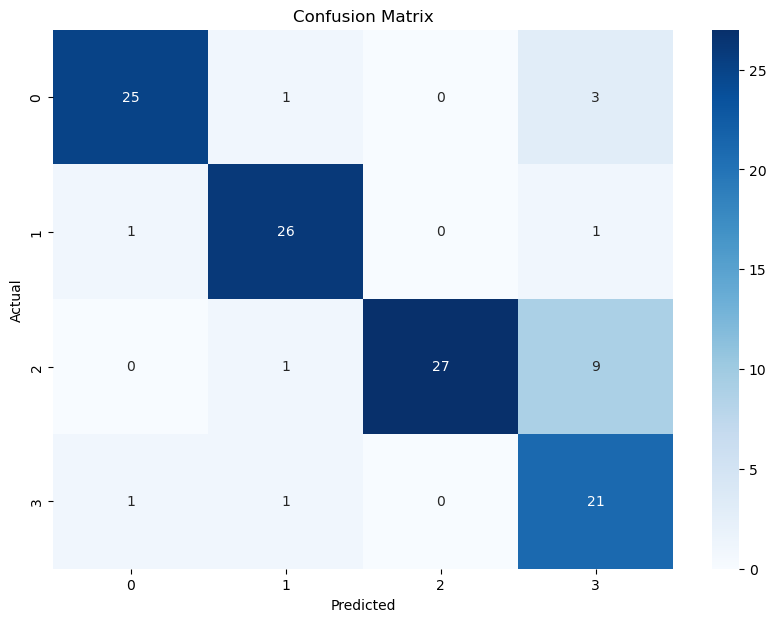

In [331]:
# Trained with best hyper-parameter tuining. 

# Define the parameter space for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter settings sampled
    scoring='roc_auc_ovr',
    cv=5,
    random_state=42,
    n_jobs=8,
    verbose=1
)
random_search.fit(X_train_reduced, y_train)

# Make predictions
y_pred = random_search.predict(X_test_reduced)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro): {recall_macro:.4f}")
print(f"F1 Score (Macro): {f1_macro:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix.png")  # Save confusion matrix as an image
plt.show()


In [332]:
# Training with base and ensemble without feature engineering classifiers.

classifiers = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
}

# Initialize a list to store results.
results = []

print("Base Classifiers & Ensemble without MISFS")
for name, clf in classifiers.items():
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate metrics.
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    precision_macro = precision_score(y_test, y_pred, average="macro")
    recall_macro = recall_score(y_test, y_pred, average="macro")
    
    # Append results to the list.
    results.append({
        "Classifier": name,
        "Accuracy": accuracy,
        "F1 Macro": f1_macro,
        "Precision Macro": precision_macro,
        "Recall Macro": recall_macro,
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort the DataFrame by Accuracy in increasing order
results_df = results_df.sort_values(by="Accuracy", ascending=True).reset_index(drop=True)

results_df.to_csv("result_df.csv")



Base Classifiers & Ensemble without MISFS


In [333]:
results_df.to_excel("result_df.xlsx")

In [334]:
# # Training with base and ensemble classifiers with MISFS.

classifierss = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "RandomForestClassifier" : RandomForestClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42,verbose=-1),
}

results_i = []

print("Base Classifiers & Ensemble with MISFS")
for name, clf in classifierss.items():
    
    clf.fit(X_train_reduced, y_train)
    y_pred = clf.predict(X_test_reduced)
    
    # Calculate metrics.
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    precision_macro = precision_score(y_test, y_pred, average="macro")
    recall_macro = recall_score(y_test, y_pred, average="macro")
    
    # Append results to the list.
    results_i.append({
        "Classifier": name,
        "Accuracy": accuracy,
        "F1 Macro": f1_macro,
        "Precision Macro": precision_macro,
        "Recall Macro": recall_macro,
    })

# Convert results to a DataFrame
results_i = pd.DataFrame(results_i)

# Sort the DataFrame by Accuracy in increasing order
results_i = results_i.sort_values(by="Accuracy", ascending=True).reset_index(drop=True)

results_i

Base Classifiers & Ensemble with MISFS


,Classifier,Accuracy,F1 Macro,Precision Macro,Recall Macro
0,KNN,0.726496,0.710044,0.706169,0.718518
1,Gradient Boosting,0.726496,0.731009,0.748016,0.732874
2,SVM,0.735043,0.734949,0.745883,0.735518
3,LightGBM,0.752137,0.753765,0.775880,0.758891
4,Logistic Regression,0.811966,0.810441,0.814815,0.816816
5,RandomForestClassifier,0.846154,0.847753,0.864286,0.860525


In [335]:
# Stacking Classifiers.

# Define the base classifiers for stacking
base_classifiers = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('lgb',LGBMClassifier(verbose=-1)),
    ('dt',DecisionTreeClassifier())
]

meta_classifier = LogisticRegression(max_iter=5000)
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier, cv=5, n_jobs=-1)

# Train the StackingClassifier
print("\nStacking Classifier:")
stacking_clf.fit(X_train_reduced, y_train)
y_pred_stack = stacking_clf.predict(X_test_reduced)

# Evaluate the StackingClassifier
print(f"Accuracy (Stacking Classifier): {accuracy_score(y_test, y_pred_stack):.4f}")
print(classification_report(y_test, y_pred_stack))




Stacking Classifier:
Accuracy (Stacking Classifier): 0.7863
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.96      0.89      0.93        28
           2       0.88      0.62      0.73        37
           3       0.49      0.78      0.60        23

    accuracy                           0.79       117
   macro avg       0.82      0.80      0.79       117
weighted avg       0.84      0.79      0.80       117



In [336]:
print("Thank you!!!")

Thank you!!!


In [337]:
print(""" References: \n1. https://www.kaggle.com/code/nkitgupta/evaluation-metrics-for-multi-class-classification\n2.https://www.mdpi.com/2079-9292/12/10/2290#sec3-electronics-12-02290\n3.https://www.kaggle.com/code/nkitgupta/evaluation-metrics-for-multi-class-classification\n4.https://www.evidentlyai.com/classification-metrics/multi-class-metrics\n5.https://scikit-learn.org/stable/modules/preprocessing.html\n6.https://medium.com/@vinodkumargr/07-standardization-and-normalization-techniques-in-machine-learning-standardscaler-3890a89bddbf.""")

 References: 
1. https://www.kaggle.com/code/nkitgupta/evaluation-metrics-for-multi-class-classification
2.https://www.mdpi.com/2079-9292/12/10/2290#sec3-electronics-12-02290
3.https://www.kaggle.com/code/nkitgupta/evaluation-metrics-for-multi-class-classification
4.https://www.evidentlyai.com/classification-metrics/multi-class-metrics
5.https://scikit-learn.org/stable/modules/preprocessing.html
6.https://medium.com/@vinodkumargr/07-standardization-and-normalization-techniques-in-machine-learning-standardscaler-3890a89bddbf.
